In [1]:
import cv2
import h5py
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as c
from keras.models import model_from_json

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
def load_model():
    # Function to load and return neural network model 
    json_file = open('models/Model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights("weights/model_B_weights.h5")
    return loaded_model

def create_img(path):
    #Function to load,normalize and return image 
    print(path)
    im = Image.open(path).convert('RGB')
    
    im = np.array(im)
    
    im = im/255.0
    
    im[:,:,0]=(im[:,:,0]-0.485)/0.229
    im[:,:,1]=(im[:,:,1]-0.456)/0.224
    im[:,:,2]=(im[:,:,2]-0.406)/0.225


    im = np.expand_dims(im,axis  = 0)
    return im

In [3]:
def predict(path):
    #Function to load image,predict heat map, generate count and return (count , image , heat map)
    model = load_model()
    image = create_img(path)
    hmap = model.predict(image)
    count = np.sum(hmap)
    return count,image,hmap

In [5]:
count,img,hmap = predict('data/part_A_final/test_data/images/IMG_170.jpg')

data/part_A_final/test_data/images/IMG_170.jpg


In [46]:
count,img,hmap = predict('../BaiduAi-github/yuncong_data/our/train/19/100.jpg')

../BaiduAi-github/yuncong_data/our/train/19/100.jpg


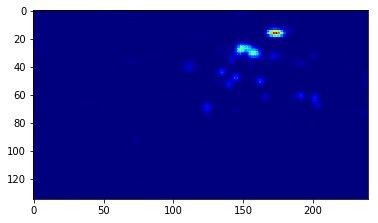

In [47]:

#print(hmap)
#Print count, image, heat map
#plt.imshow(img.reshape(img.shape[1],img.shape[2],img.shape[3]))
#plt.show()
plt.imshow(hmap.reshape(hmap.shape[1],hmap.shape[2]) , cmap = c.jet )
plt.show()


In [48]:
print(np.amax(hmap))

0.22679995


In [56]:
location=[]
n=0
for i in range(hmap.shape[1]):
    for j in range(hmap.shape[2]):
        if hmap[0][i][j][0]>0.40244*np.amax(hmap) and hmap[0][i][j][0]<0.80244*np.amax(hmap):
            location.append((8*j,8*i))
            n=n+1
print(n)
print(location)

50
[(1360, 112), (1368, 112), (1376, 112), (1384, 112), (1392, 112), (1400, 112), (1408, 112), (1360, 120), (1368, 120), (1376, 120), (1384, 120), (1392, 120), (1400, 120), (1408, 120), (1352, 128), (1360, 128), (1368, 128), (1400, 128), (1416, 128), (1424, 128), (1376, 136), (1384, 136), (1392, 136), (1400, 136), (1408, 136), (1376, 144), (1392, 144), (1408, 144), (1184, 200), (1184, 208), (1192, 208), (1200, 208), (1184, 216), (1192, 216), (1200, 216), (1224, 216), (1184, 224), (1192, 224), (1184, 232), (1248, 232), (1256, 232), (1264, 232), (1272, 232), (1248, 240), (1256, 240), (1264, 240), (1248, 248), (1256, 248), (1264, 248), (1272, 248)]


In [8]:
temp = h5py.File('data/part_A_final/test_data/ground/IMG_170.h5' , 'r')
temp_1 = np.asarray(temp['density'])
#plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)

Original Count :  664
